##Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.
* Age: Age in years
* Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

 Importing the necessary libraries and briefly explain the use of each library 

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# You don't have to explain about these libraries below
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Read the given dataset

In [ ]:
pima = pd.read_csv("diabetes.csv")

Show the last 5 records of the dataset

In [ ]:
print(pima.tail(5))
pima['Age']

0      50
1      31
2      32
3      21
4      33
       ..
995    21
996    42
997    29
998    28
999    29
Name: Age, Length: 1000, dtype: int64

Show the first 5 records of the dataset

In [ ]:
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Find the dimension of the `pima` dataframe

In [ ]:
pima.shape

(1000, 9)

we got (1000,9) as a answer it means we have total 1000 record in this dataset and total 9 features as a columns in this dataset


Find the size of the `pima` dataframe

In [ ]:
pima.size

9000

the size of the dataset means total number of element inside the datset or multiplication of total number of rows and columns


Display the data types of all the variables in the data set


In [ ]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

missing values in the `pima` dataframe

In [ ]:
pima.isnull().values.any()

False

isnull method check if there is any missing value or not and any() method returns the boolean true or false so that we can know is there any missing value or not?


summary statistics for all variables except for  `'Outcome'` variable

In [ ]:
pima.iloc[:,:-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.051000,125.21600,69.072000,20.755000,83.086000,32.664772,0.494090,33.830000
std,3.325576,32.27772,20.465328,16.008599,117.255326,7.563614,0.322158,11.268189
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,28.275000,0.258750,25.000000
50%,3.000000,122.00000,72.000000,24.000000,23.000000,32.800000,0.408500,30.000000
75%,6.000000,146.00000,80.000000,33.000000,133.500000,36.900000,0.658500,41.000000
max,17.000000,199.00000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


1. count : total number of records in dataset
2. mean : mean of total records in respective field
3. std : standard deviation of total records in respective features(coloumn)
4. min : minimum value in respective column
5. 25% : 25% data have value 1 or below
6. 50% : 50% data have value 3 or below
7. 75% : 75% data have value 6 or below
8. max : maximum values in respective field


distribution plot for the variable 'BloodPressure'

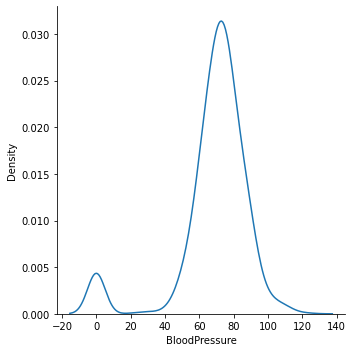

In [ ]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

using displot with kernel density estimation. we can observe that data  is distribute most in between 40-120 for blood pressure.


In [ ]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

max() function used to find maximum value for features name BMI


#mean of the variable 'BMI' 
#median of the variable 'BMI' 
#mode of the variable 'BMI'


In [ ]:
m1 = pima['BMI'].mean()  #Mean
print(m1)
m2 = pima['BMI'].median()  #Median
print(m2)
m3 = pima['BMI'].mode()[0]  #Mode
print(m3)

32.664772391408796
32.8
32.0


mean , median and mode of BMI is 32.66 , 32.8 and 32 respectively and this 3 are central tendecy measures and they are not perfectly equal.


finding How many women's `'Glucose'` level is above the mean level of `'Glucose'`

In [ ]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

449

total 449 women's glucose level is above the mean level of glucose


Create the pairplot for variables `'Glucose'`, `'SkinThickness'` and `'DiabetesPedigreeFunction'`

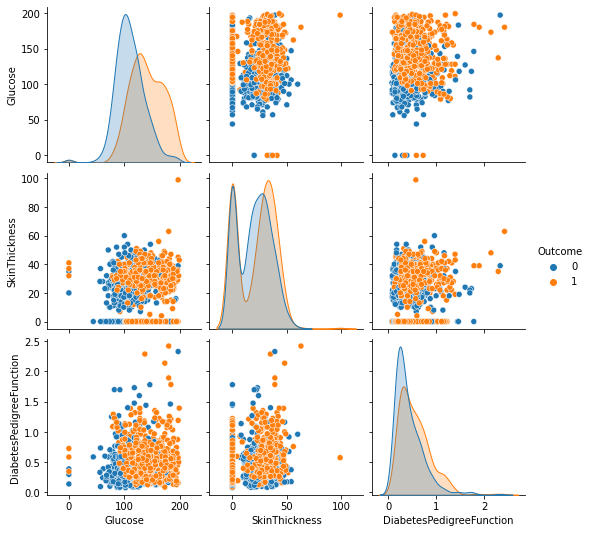

In [ ]:
sns.pairplot(data=pima, vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

Plot the scatterplot between `'Glucose'` and `'Insulin'`

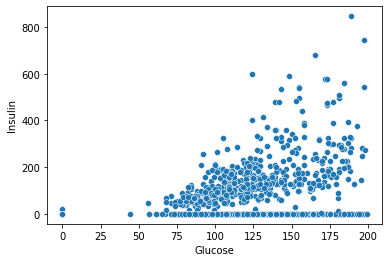

In [ ]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

As we can in scatter plot , as glucose level is increase the insulin level is also increase.  lots of data for higher glucose value have insulin nearly lied to 0 .


Plot the boxplot for the 'Age' variable

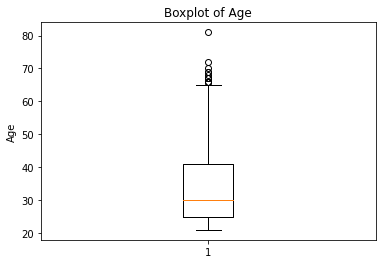

In [ ]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

using box plot we can find outliers in our dataset. as we can see that there some data for age which is lies outside of box.


the correlation matrix

In [ ]:
corr_matrix = pima.iloc[:,0:8].corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112930,0.127463,-0.080033,-0.064909,0.012920,-0.025452,0.548665
Glucose,0.112930,1.000000,0.134993,0.050656,0.334175,0.222138,0.127004,0.255567
BloodPressure,0.127463,0.134993,1.000000,0.249063,0.117369,0.247275,0.059303,0.240416
SkinThickness,-0.080033,0.050656,0.249063,1.000000,0.472663,0.387055,0.214026,-0.121236
Insulin,-0.064909,0.334175,0.117369,0.472663,1.000000,0.198281,0.180284,-0.039887
BMI,0.012920,0.222138,0.247275,0.387055,0.198281,1.000000,0.163270,0.023921
DiabetesPedigreeFunction,-0.025452,0.127004,0.059303,0.214026,0.180284,0.163270,1.000000,0.006809
Age,0.548665,0.255567,0.240416,-0.121236,-0.039887,0.023921,0.006809,1.000000


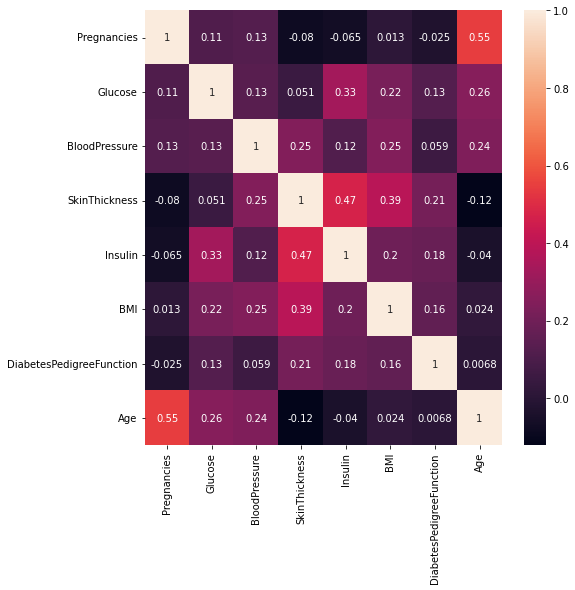

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

correlation matrix is between -1 to 1. when correlation is tending more towards 1 it means features are proportional and if it is tending towards -1 it means features are inversely proportional.here we can see age and prgnancy , insulin and skinthickness , glucose and insulins are somehow proportional features. 


## Model Training

Split and scale the data

In [ ]:
y = pima.Outcome
x = pima.drop('Outcome', axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify=y,  random_state = 45)

Train a Logistic Regression Model

In [ ]:
# import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# fit the model on the train set
m = lr.fit(x_train, y_train)

# Predict on x_test
y_pred = m.predict(x_test)

# Evaluate the model
print('Accuracy of Logistic Regression model on the train set: {:.2f}'.format(m.score(x_train, y_train)))
print('Accuracy of the Logictic Regression model on the test set: {:.2f}'.format(m.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy of Logistic Regression model on the train set: 0.77
Accuracy of the Logictic Regression model on the test set: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[62, 13],
       [23, 52]])

logistic regression gave accuracy of 77% on training set and 76% accuracy on test set. we got true positive : 62 which are positive and predicted positively and true negative : 52

Train a Random Forest Model

In [ ]:
# Import the Model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model. 
rf = RandomForestClassifier(n_estimators=301, max_depth=3)

# fit the model on the train set
m2 = rf.fit(x_train, y_train)

# Predict on x_test
y_pred2 = m2.predict(x_test)

# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(m2.score(x_train, y_train)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(m2.score(x_test, y_test)))
confusion_matrix(y_test, y_pred2)

Accuracy of Random Forest model on the train set: 0.82
Accuracy of Random Forest model on the test set: 0.78


array([[57, 18],
       [15, 60]])

during random forest classification , model gives 82% accuracy on training set and 78% accuracy on test set. true postive : 57 and true negative : 60

Which model performed better

logistic regression gives 77% accuracy on training data and random forest gives 82% accuracy on training data so accuracy of random forest is greater than logistic regression.